In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)
    
sep_coins = cv2.imread('C:/Users/John Lang/Desktop/ComputerVision/DATA/pennies.jpg')

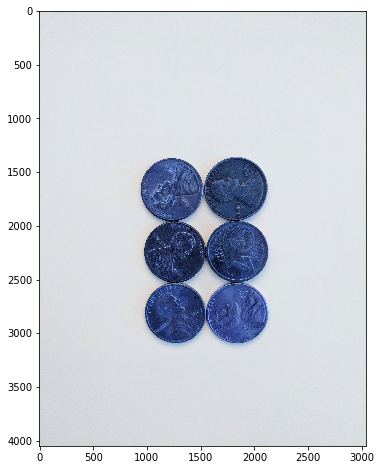

In [2]:
display(sep_coins)

In [3]:
# Median Blur 
# convert to grayscale
# binary threshold
# find the contours

In [4]:
sep_blur = cv2.medianBlur(sep_coins, 25)

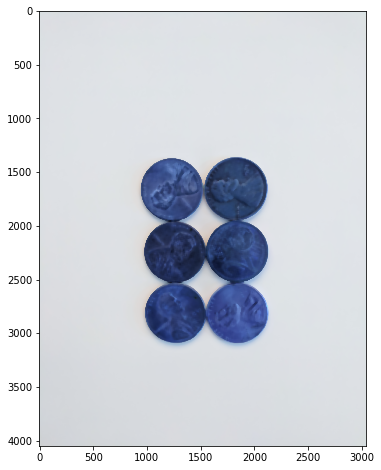

In [5]:
display(sep_blur)

In [19]:
gray_sep_coins = cv2.cvtColor(sep_blur, cv2.COLOR_RGB2GRAY)

In [21]:
ret, sep_thres = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

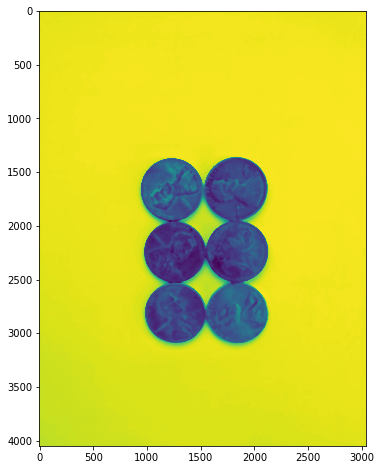

In [20]:
display(gray_sep_coins)

In [24]:
image,contours,hierarchy = cv2.findContours(sep_thres.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [26]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

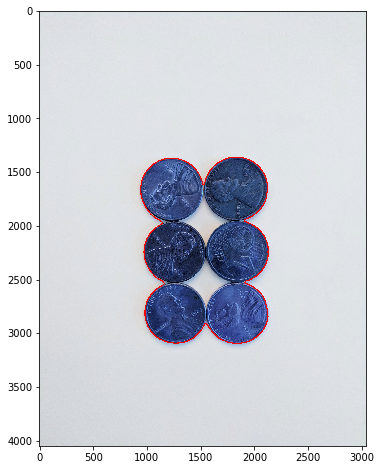

In [27]:
display(sep_coins)

In [28]:
for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(gray_sep_coins,contours,i,(255,0,0),10)

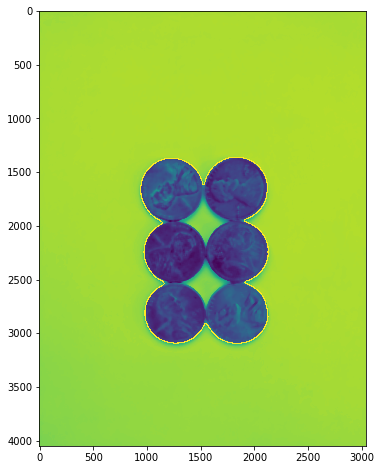

In [29]:
display(gray_sep_coins)

In [30]:
img = cv2.imread('C:/Users/John Lang/Desktop/ComputerVision/DATA/pennies.jpg')

In [31]:
img = cv2.medianBlur(img, 35)

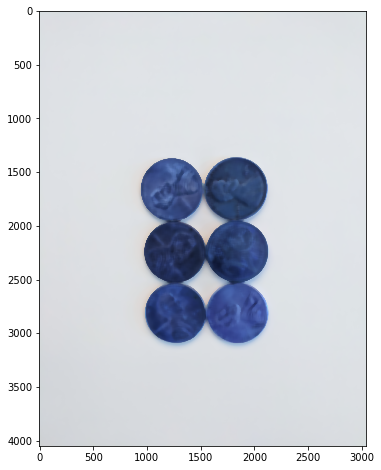

In [32]:
display(img)

In [33]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [36]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

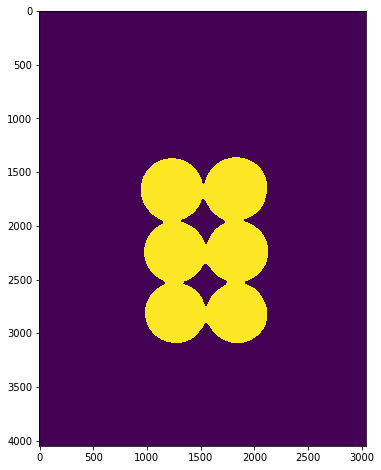

In [37]:
#otsu's method

display(thresh)

In [39]:
# noise removal (optional)
kernel = np.ones((3,3),np.uint8)

In [40]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

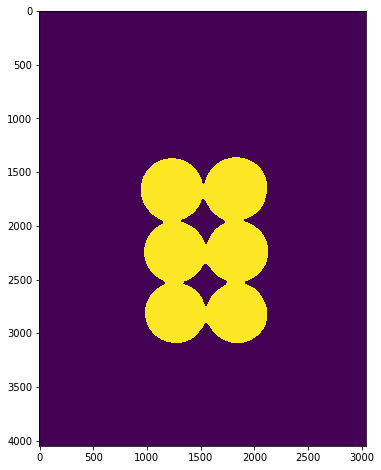

In [41]:
display(opening)

In [42]:
# Distance Transform
# color away from 0 actually become brighter
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

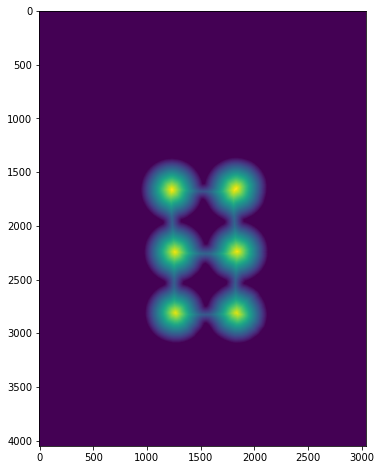

In [43]:
display(dist_transform)

In [44]:
ret,sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

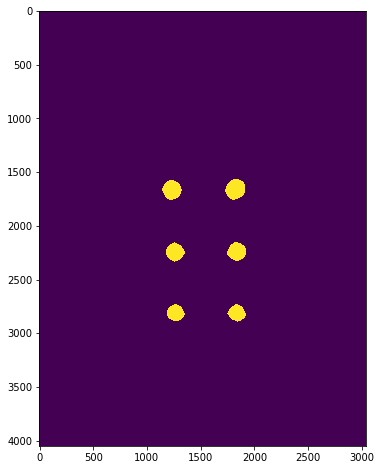

In [45]:
display(sure_fg)

In [48]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)

In [49]:
sure_fg = np.uint8(sure_fg)

In [50]:
unknown = cv2.subtract(sure_bg, sure_fg)

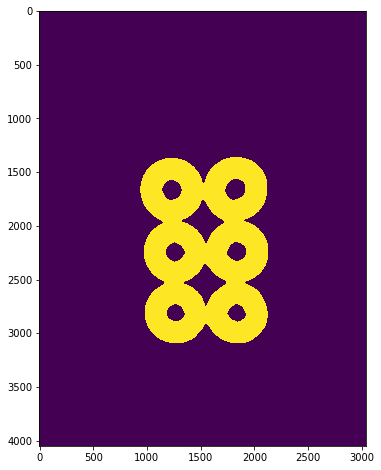

In [51]:
display(unknown)

In [52]:
ret, marker = cv2.connectedComponents(sure_fg)

In [54]:
marker = marker+1

In [55]:
marker[unknown==255] = 0

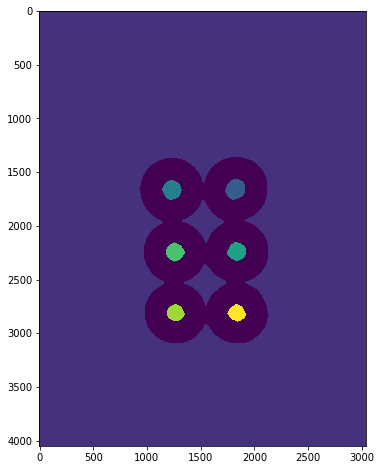

In [56]:
display(marker)

In [59]:
markers = cv2.watershed(img,marker)

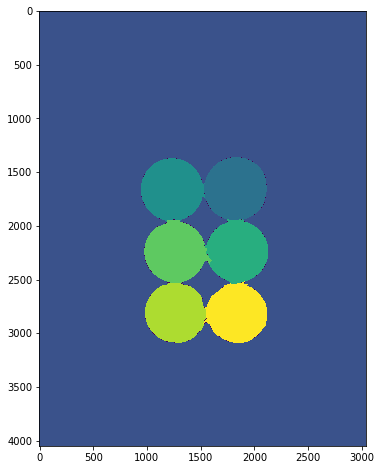

In [60]:
display(marker)

In [61]:
image,contours,hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

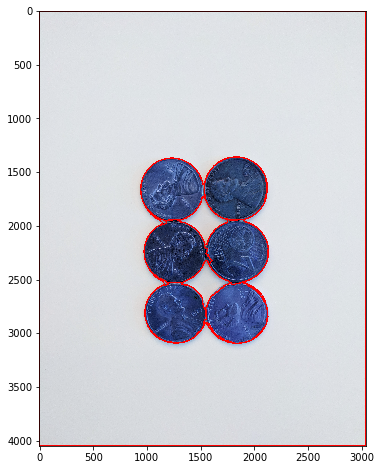

In [65]:
display(sep_coins)